# 1 Use Cases for Model Insights

---

# 2 Permutation Importance

## How It Works

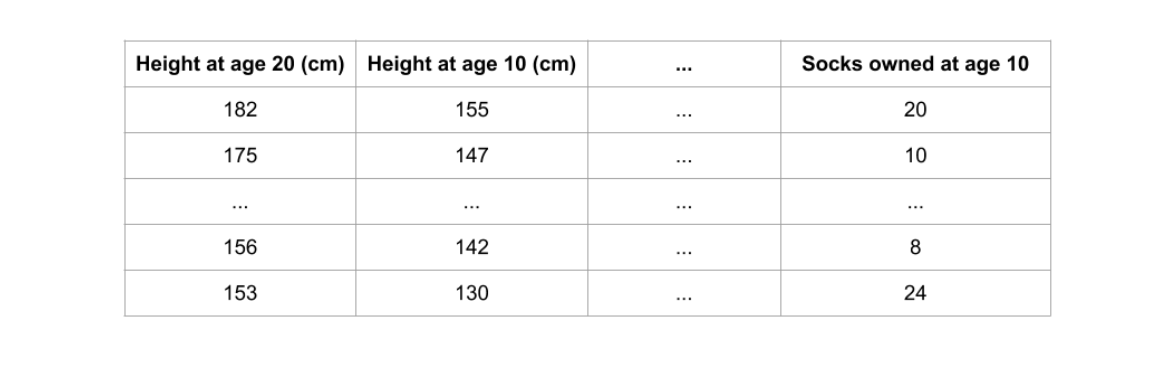

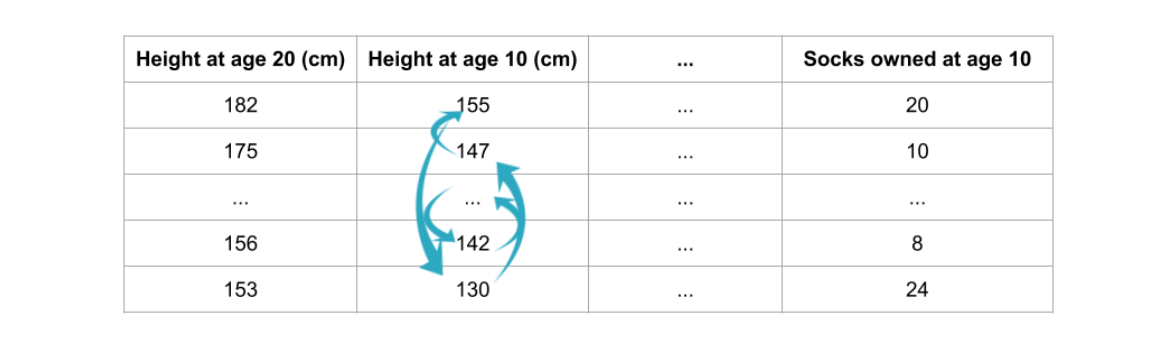


## Code Example

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [3]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

dot: command not found


CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 127. [stderr: 'dot: command not found\n']

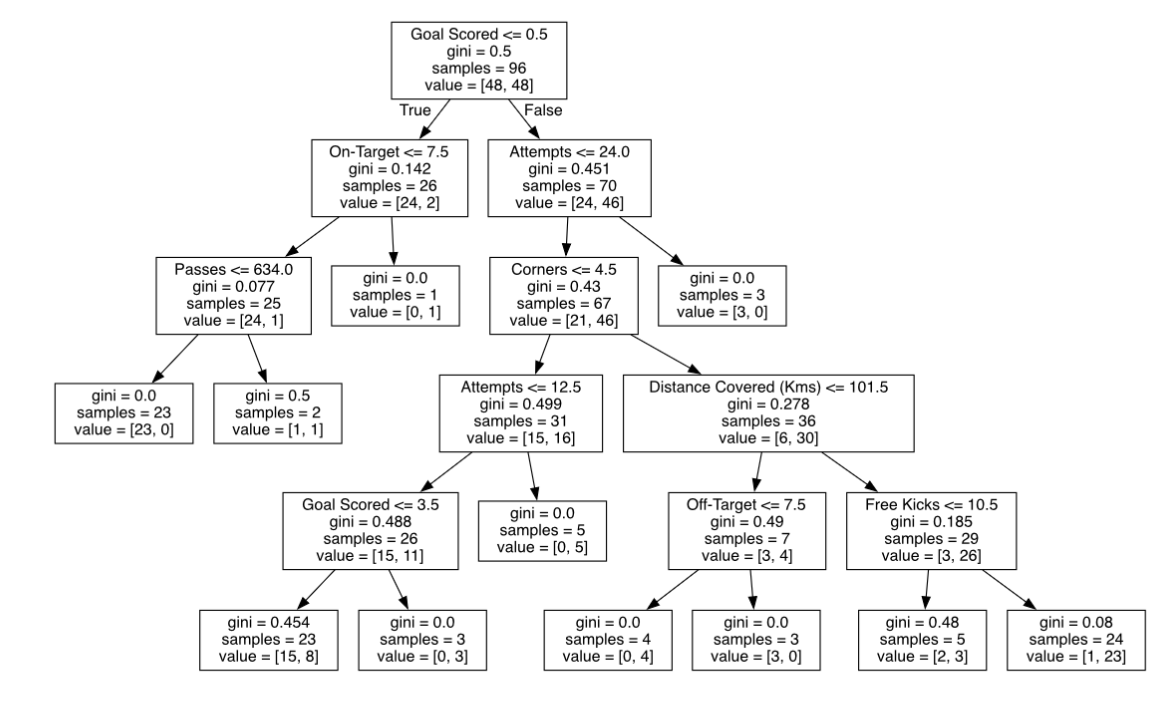

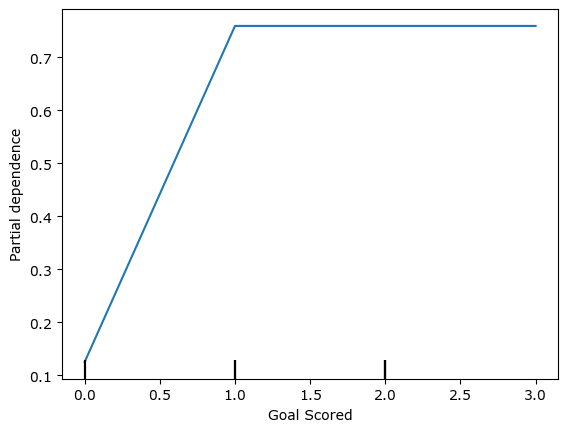

In [4]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])
plt.show()

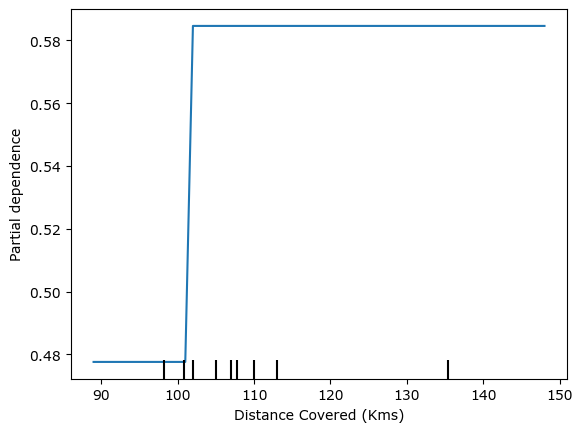

In [5]:
feature_to_plot = 'Distance Covered (Kms)'
disp2 = PartialDependenceDisplay.from_estimator(tree_model, val_X, [feature_to_plot])
plt.show()

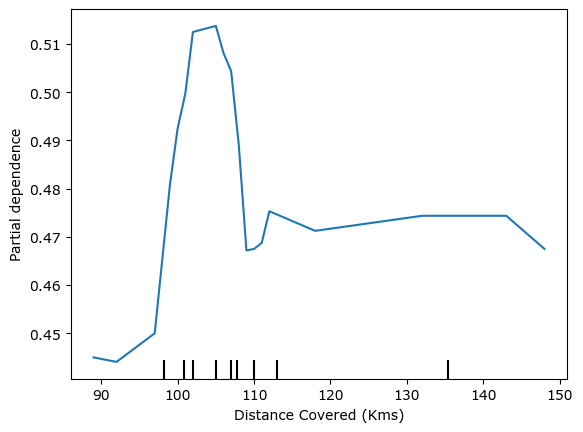

In [6]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

disp3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [feature_to_plot])
plt.show()

## 2D Partial Dependence Plots

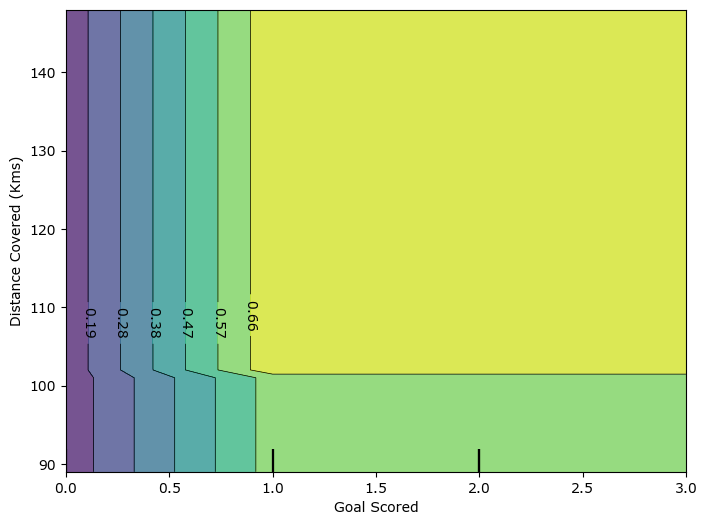

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Goal Scored', 'Distance Covered (Kms)')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(tree_model, val_X, f_names, ax=ax)
plt.show()

---

# 4 SHAP Values

## How They Work

SHAP değerleri bağlantı kurulması gereken iki özelliği ispatlayarak hesaplar. Formülü:

```sum(SHAP values for all features) = pred_for_team - pred_for_baseline_values```

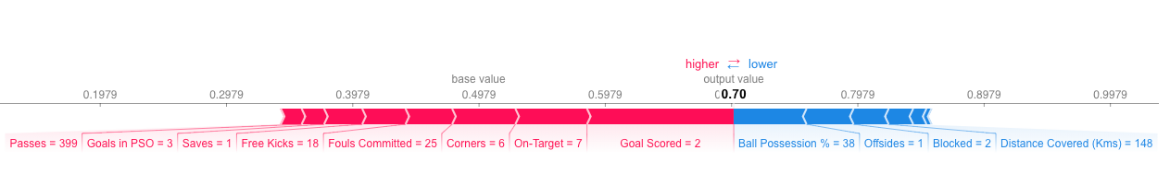

# Code to Calculate SHAP Values

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [9]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

/private/var/containers/Bundle/Application/12A992CB-DC3A-4820-AA6F-76A41FA7E9CE/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

In [10]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Using cached shap-0.46.0.tar.gz (1.2 MB)
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.60.0.tar.gz (2.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      segmentation fault
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

---

# Advanced Uses of SHAP Values


## SHAP Values Review


Shap değerleri herhangi bir tahmini her bir özellik değerinin etkilerinin toplamına ayrıştırmamıza izin vererek şöyle bir grafik verir:

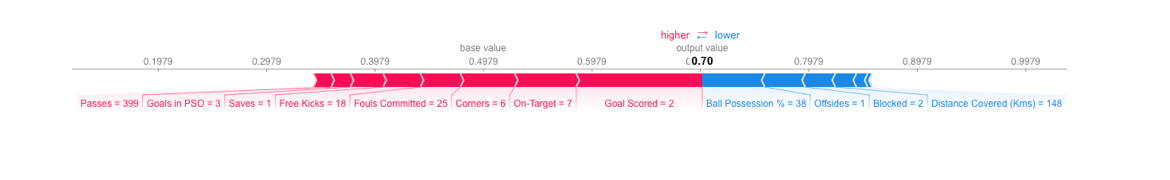

# Summary Plots


SHAP özet grafikleri bize özellik önemine ve onu neyin yönlendirdiğine dair kuş bakışı bir bakış açısı veriyor. Futbol verileri için örnek bir arsa üzerinden geçeceğiz:

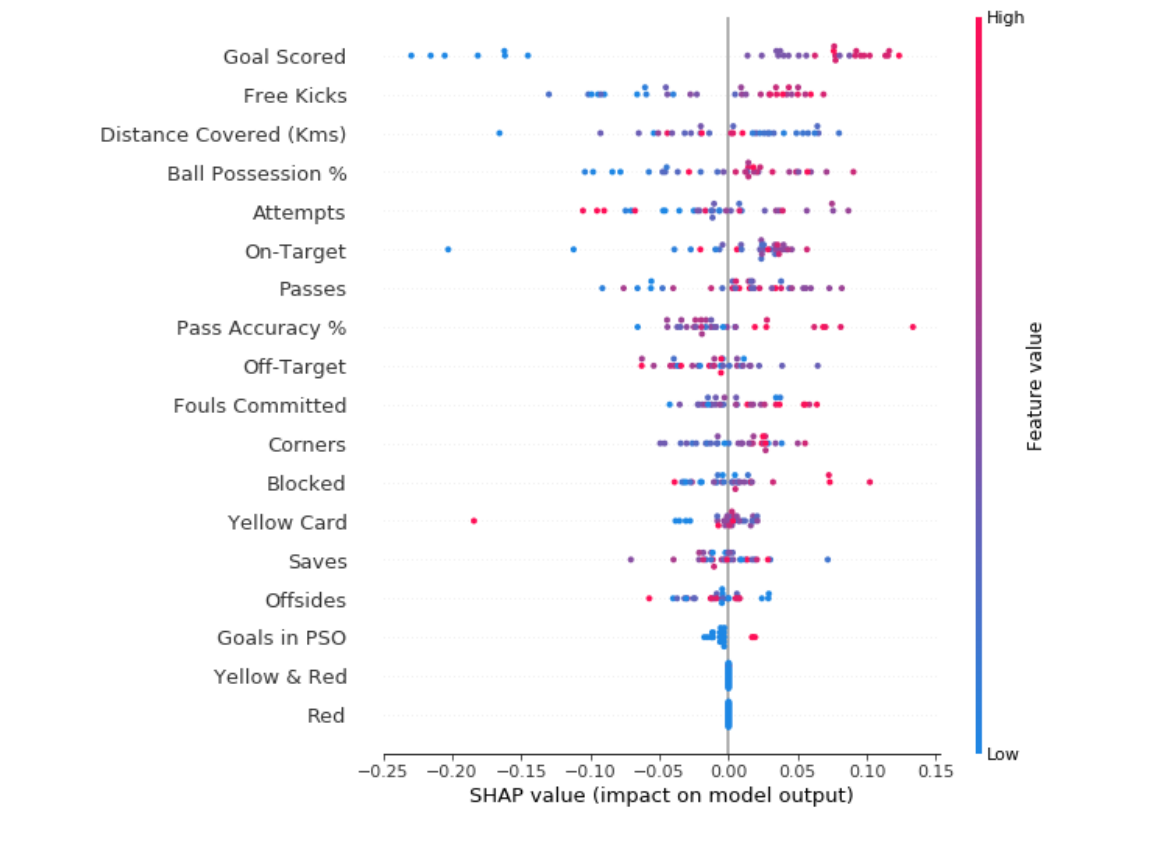

# Summary Plots in Code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

# SHAP Dependence Contribution Plots

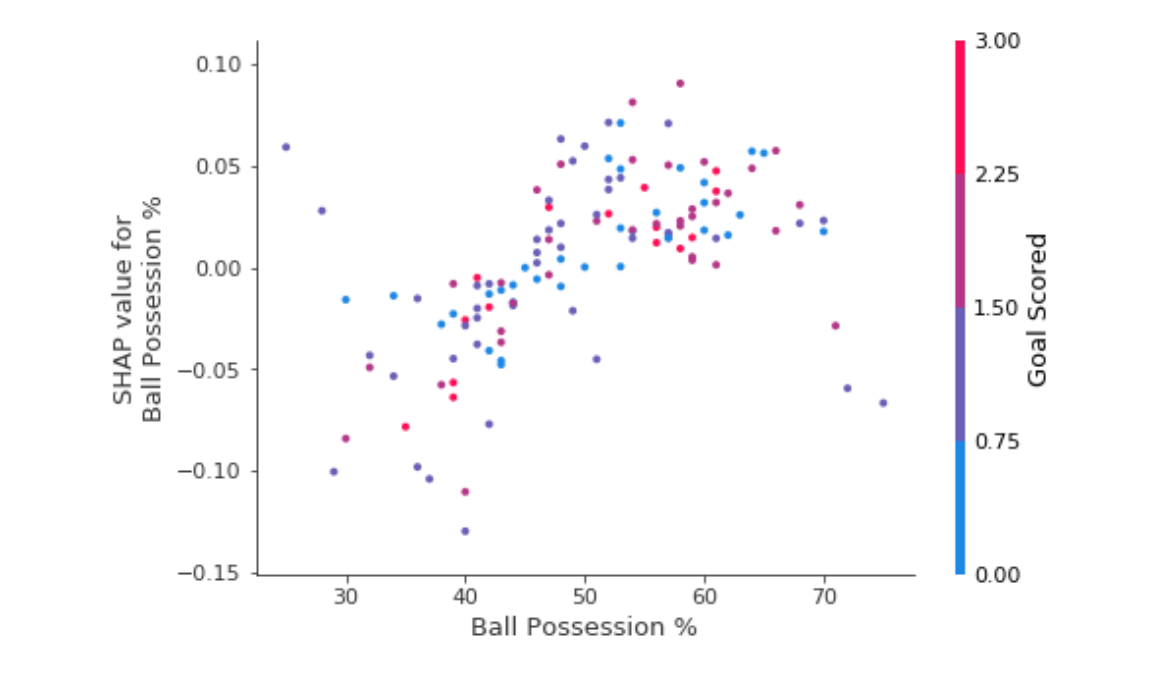

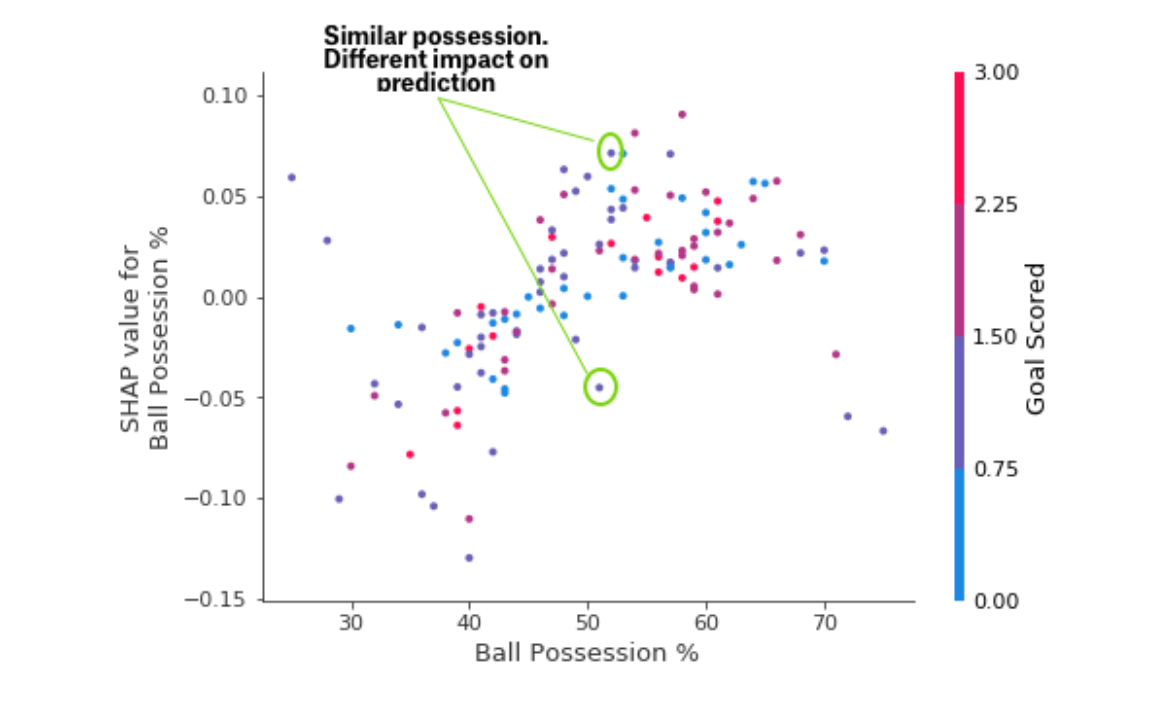

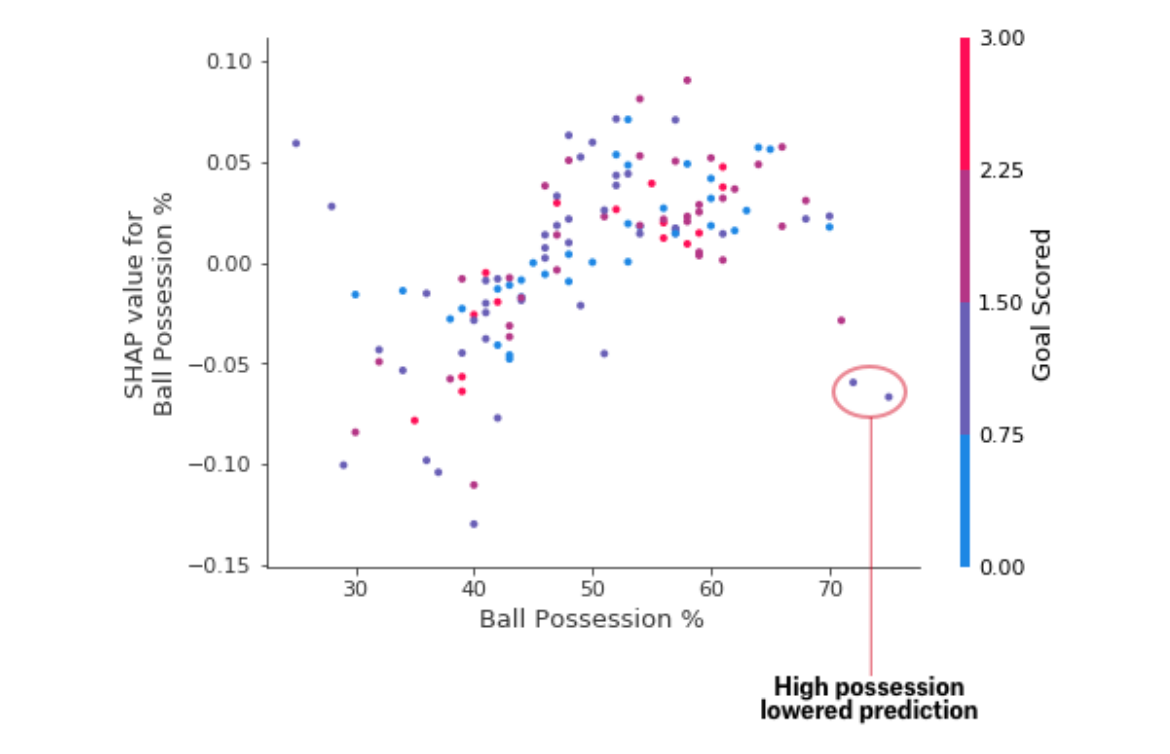

Bu iki nokta, yukarı yönlü eğilimden uzak olduğu için uzamsal olarak öne çıkıyor. Her ikisi de mor renklidir, bu da takımın bir gol attığını gösterir. Bunu **Genel olarak, topa sahip olmak bir takımın oyuncusunun ödülü kazanma şansını artırır. Ancak sadece bir gol atarlarsa, bu eğilim tersine döner ve ödül jürileri o kadar az gol atarlarsa topa bu kadar çok sahip oldukları için onları cezalandırabilir.**

# Dependence Contribution Plots in Code

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")

---